## Import Libraries

In [1]:
import requests
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import time
import zipfile
import datetime

## Getting Data from Wikipedia API

**N.B. Data downloading is very time consuming and so computational intensive. It can take from several hours to two days to get all data download irrespective of computational capacity or internet speed. Authors do not suggest running the below codes for downloading data. The data is properly downloaded and stored in a google drive in a zipped folder that is open for anyone to use. The below portion is only for demonstration purpose of how the data can be downloaded from Wikipedia API. In any case, a code segment is provided in order to download the stored data and make it usable for the purpose of this project. If user wants, they can uncomment the code segments to download data from API.**  

In [2]:
# below lines are commented so that the code can be run without the need of the API

'''
def getData(continueVariable, startDate, endDate): # Function to get data from the API
  global S # Session object to make requests
  # continueVariable is a key containing the next set of records
  if(continueVariable != ''): # If continueVariable is not empty then continue to get data
    PARAMS = { # Parameters for the API request
      "action": "query", # Action to query the API
      "format": "json", # Format of the response
      "list": "logevents", # List of events to get
      "lelimit": "500", # Limit of records to get
      "letype":"block", # Type of events to get
      "lestart":startDate, # Start date of the records
      "leend":endDate, # End date of the records
      "ledir":"newer", # Direction of the records
      "lecontinue" : continueVariable # Continue variable to get next set of records
  }
      
    R = S.get(url=URL, params=PARAMS) # Make a request to the API
    DATA = R.json() # Get the response in JSON format
    if 'continue' in DATA: # If there are more records to get
      continueVariable = DATA['continue']['lecontinue'] # Get the continue variable
    else: # If end of records
      continueVariable = ''  # Set continue variable to empty string
    LOGS = DATA["query"]["logevents"] # Get the logs from the response
    return LOGS, continueVariable # Return the logs and continue variable
  
  else: 
    # If end of records then return custom -1 and empty string
    return -1,''
'''

'\ndef getData(continueVariable, startDate, endDate): # Function to get data from the API\n  global S # Session object to make requests\n  # continueVariable is a key containing the next set of records\n  if(continueVariable != \'\'): # If continueVariable is not empty then continue to get data\n    PARAMS = { # Parameters for the API request\n      "action": "query", # Action to query the API\n      "format": "json", # Format of the response\n      "list": "logevents", # List of events to get\n      "lelimit": "500", # Limit of records to get\n      "letype":"block", # Type of events to get\n      "lestart":startDate, # Start date of the records\n      "leend":endDate, # End date of the records\n      "ledir":"newer", # Direction of the records\n      "lecontinue" : continueVariable # Continue variable to get next set of records\n  }\n      \n    R = S.get(url=URL, params=PARAMS) # Make a request to the API\n    DATA = R.json() # Get the response in JSON format\n    if \'continue\' in

In [3]:
# below lines are commented so that the code can be run without the need of the code segment

'''
def updateCSV(year, data):
    # Make data frame of above data
    df = pd.DataFrame.from_records(data) # Convert the data to a data frame

    # append data frame to CSV file
    df.to_csv(str(year)+'.csv', mode='a', index=False, header=False) # Append the data frame to the CSV file
''' 

"\ndef updateCSV(year, data):\n    # Make data frame of above data\n    df = pd.DataFrame.from_records(data) # Convert the data to a data frame\n\n    # append data frame to CSV file\n    df.to_csv(str(year)+'.csv', mode='a', index=False, header=False) # Append the data frame to the CSV file\n"

In [4]:
# below lines are commented so that the code can be run without the code segment

'''
# Send first initial request to get the first continueVariable
def firstCall(startDate, endDate, year):
  global S # Session object to make requests
  global URL # URL of the API

  PARAMS = { # Parameters for the API request
      "action": "query",
      "format": "json",
      "list": "logevents",
      "lelimit": "500",
      "letype":"block",
      "lestart":startDate,
      "leend":endDate,
      "ledir":"newer"
  }

  R = S.get(url=URL, params=PARAMS) # Make a request to the API

  DATA = R.json() # Get the response in JSON format

  LOGS = DATA["query"]["logevents"] # Get the logs from the response
  continueVariable = DATA['continue']['lecontinue'] # Get the continue variable
  # Initialize to a local csv file
  df = pd.DataFrame.from_records(LOGS) # Convert the data to a data frame

  directory = 'data' # Directory to store the data
  # Create the directory if it doesn't exist already
  if not os.path.exists(directory):
    os.makedirs(directory)

  df.to_csv('../data/'+str(year)+'.csv', mode='a', index=False)
  return LOGS, continueVariable
'''

'\n# Send first initial request to get the first continueVariable\ndef firstCall(startDate, endDate, year):\n  global S # Session object to make requests\n  global URL # URL of the API\n\n  PARAMS = { # Parameters for the API request\n      "action": "query",\n      "format": "json",\n      "list": "logevents",\n      "lelimit": "500",\n      "letype":"block",\n      "lestart":startDate,\n      "leend":endDate,\n      "ledir":"newer"\n  }\n\n  R = S.get(url=URL, params=PARAMS) # Make a request to the API\n\n  DATA = R.json() # Get the response in JSON format\n\n  LOGS = DATA["query"]["logevents"] # Get the logs from the response\n  continueVariable = DATA[\'continue\'][\'lecontinue\'] # Get the continue variable\n  # Initialize to a local csv file\n  df = pd.DataFrame.from_records(LOGS) # Convert the data to a data frame\n\n  directory = \'data\' # Directory to store the data\n  # Create the directory if it doesn\'t exist already\n  if not os.path.exists(directory):\n    os.makedirs(di

In [5]:
# below lines are commented so that the code can be run without the code segment

'''
def getAllYearsData(years):
  for year in date_range: # Loop through the years
    startDate = str(year)+'-01-01T00:00:00Z' # Start date of the year
    endDate = str(year+1)+'-01-01T00:00:00Z' # End date of the year

    LOGS, continueVariable = firstCall(startDate, endDate, year) # Get the first set of records

    count = len(LOGS) # Count of records fetched
    while(continueVariable != ''): # Loop through the records
        newLogs, continueVariable = getData(continueVariable, startDate, endDate) # Get the next set of records
        count+= len(newLogs) # Update the count of records fetched
        if(continueVariable == ''): # If end of records
            print(f'{year} DONE! Total Records fetched {count}') # Print the total records fetched
            break # Break the loop
        updateCSV(year,newLogs) # Update the CSV file with the new records
'''

"\ndef getAllYearsData(years):\n  for year in date_range: # Loop through the years\n    startDate = str(year)+'-01-01T00:00:00Z' # Start date of the year\n    endDate = str(year+1)+'-01-01T00:00:00Z' # End date of the year\n\n    LOGS, continueVariable = firstCall(startDate, endDate, year) # Get the first set of records\n\n    count = len(LOGS) # Count of records fetched\n    while(continueVariable != ''): # Loop through the records\n        newLogs, continueVariable = getData(continueVariable, startDate, endDate) # Get the next set of records\n        count+= len(newLogs) # Update the count of records fetched\n        if(continueVariable == ''): # If end of records\n            print(f'{year} DONE! Total Records fetched {count}') # Print the total records fetched\n            break # Break the loop\n        updateCSV(year,newLogs) # Update the CSV file with the new records\n"

In [6]:
date_range = [*range (2004, 2023, 1)] # Range of years to get the data
# the above line is intentionally left uncommented because the declared variable will be needed for further processing

# S = requests.Session() # Session object to make requests
# URL = "https://en.wikipedia.org/w/api.php" # URL of the API

In [7]:
# getAllYearsData(date_range) # Get the data for all the years

The below code segment is responsible for downloading the data from the author's google drive and unzip it so that any user can continue with the project without scrapping any single data.

> Note

**You can either download the zipped folder from the link and unzip it in the root folder. Or you can run the below code segment to automatically download and unzip the folders in the root folder.**

In [8]:
'''
import gdown # Download the file from Google Drive

# URL for downloading the file
download_url = 'https://drive.google.com/uc?id=1WHFJ6wm4ElKH4KIAsa3A1ph4Bt34VYsH'

# Destination file path for saving the downloaded zip file
zip_file_path = 'data.zip'

# Download the file
gdown.download(download_url, zip_file_path, quiet=False)

# Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall('.')

# # Remove the zip file after extraction
# os.remove(zip_file_path)

print("File downloaded and unzipped successfully!")
'''

'\nimport gdown # Download the file from Google Drive\n\n# URL for downloading the file\ndownload_url = \'https://drive.google.com/uc?id=1WHFJ6wm4ElKH4KIAsa3A1ph4Bt34VYsH\'\n\n# Destination file path for saving the downloaded zip file\nzip_file_path = \'data.zip\'\n\n# Download the file\ngdown.download(download_url, zip_file_path, quiet=False)\n\n# Unzip the file\n# with zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n#     zip_ref.extractall(\'.\')\n\n# # Remove the zip file after extraction\n# os.remove(zip_file_path)\n\nprint("File downloaded and unzipped successfully!")\n'

## Loading the data

In [9]:
path = 'data' # Path to the data
df = pd.DataFrame() # Data frame to store the data
for date in date_range: # Loop through the years
  csvData = pd.read_csv(f'{path}/{date}.csv', on_bad_lines='skip', low_memory=False) # Read the data from the CSV file and store it in a data frame
  print(date) 
  csvData['year'] = date # Add a new column to the data frame with the year
  date = pd.DataFrame(csvData) # Convert the data to a data frame
  frames = [df, date] # Frames to concatenate

  df = pd.concat(frames) # Concatenate the data frames

2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


Looking upon the overall info of the primary dataframe

In [10]:
df.info() # Get the information of the data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14047048 entries, 0 to 4404498
Data columns (total 25 columns):
 #   Column                                                                                              Dtype  
---  ------                                                                                              -----  
 0   logid                                                                                               object 
 1   ns                                                                                                  object 
 2   title                                                                                               object 
 3   pageid                                                                                              object 
 4   logpage                                                                                             object 
 5   params                                                                                    

Display the whole dataframe

In [11]:
df

,logid,ns,title,pageid,logpage,params,type,action,user,timestamp,...,2,User:105.112.28.221,0,0.1,"{'duration': '71 hours', 'flags': ['nocreate'], 'sitewide': '', 'expiry': '2022-01-04T01:11:32Z'}",block,reblock,ST47ProxyBot,2022-01-01T02:11:32Z,{{blocked p2p proxy|ip=105.112.28.221|isp=Airtel Networks Limited}} <!-- API-confirmed P2P VPN -->
0,11,2,User:Angela,21123841,0,"{'duration': 'infinity', 'flags': []}",block,block,Angela,2004-12-23T03:38:56Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,2,User:Dori,167217,0,"{'duration': 'infinity', 'flags': []}",block,block,Dori,2004-12-23T03:45:30Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,2,User:Brion VIBBER,36532,0,"{'duration': 'infinity', 'flags': []}",block,block,Brion VIBBER,2004-12-23T03:46:26Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,2,User:#13255,0,0,{},block,unblock,Angela,2004-12-23T03:53:33Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33,2,User:#13254,0,0,{},block,unblock,Angela,2004-12-23T03:53:59Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,User:27.34.46.101,0.0,0.0,"{'duration': '71 hours', 'flags': ['nocreate']...",block,block,ST47ProxyBot,2022-07-01T07:09:17Z,{{blocked p2p proxy|ip=27.34.46.101|isp=Dynami...
4404495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,User:41.58.86.5,0.0,0.0,"{'duration': '167 hours', 'flags': ['nocreate'...",block,block,ST47ProxyBot,2022-07-01T07:09:17Z,{{blocked p2p proxy|ip=41.58.86.5|isp=SWIFT-NE...
4404496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,User:5.235.177.161,0.0,0.0,"{'duration': '71 hours', 'flags': ['nocreate']...",block,block,ST47ProxyBot,2022-07-01T07:09:17Z,{{blocked p2p proxy|ip=5.235.177.161|isp=Telec...
4404497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,User:154.160.19.71,0.0,0.0,"{'duration': '671 hours', 'flags': ['anononly'...",block,block,ST47ProxyBot,2022-07-01T07:09:18Z,{{blocked p2p proxy|ip=154.160.19.71|isp=Scanc...


Loading the policies data from the stored CSV file.

**N.B. Policies data is manually created by surfing through the internet and figuring out the exact timelines of introducing a new policy. For this reason, there is no code to get the frequency of policies data based on months.**

In [12]:
nb_policies = pd.read_csv('./data/freq_policies_monthly.csv') # Read the data from the CSV file and store it in a data frame

## Analyzing data for Hypothesis 1

<hr>

Hypothesis 1 in this project states that,

**_Evolving policies might not reduce editor blocks and reblocks, thus failing to improve their behavior._**

### Cleaning the data for analysis

In [13]:
h1_df = df[['title', 'params', 'type', 'action', 'user', 'year']] # Get the required columns from the data frame

In [14]:
# drop rows with NaN values as they are not useful for our analysis

h1_df = h1_df.dropna()

# drop rows where type is not block as we are only interested in block actions

h1_df = h1_df[h1_df['type'] == 'block']

In [15]:
# find number of action == block per year

blocking_df = h1_df[h1_df['action'] == 'block'].groupby('year').size() # Group the data by year and find the size of each group

# find number of action == unblock per year

unblocking_df = h1_df[h1_df['action'] == 'unblock'].groupby('year').size() # Group the data by year and find the size of each group

# find number of action == reblock per year

reblocking_df = h1_df[h1_df['action'] == 'reblock'].groupby('year').size() # Group the data by year and find the size of each group

# Join the dataframes

blocking_df = blocking_df.to_frame().reset_index() # Convert the data to a data frame
blocking_df.columns = ['year', 'blocks'] # Rename the columns

unblocking_df = unblocking_df.to_frame().reset_index() # Convert the data to a data frame
unblocking_df.columns = ['year', 'unblocks'] # Rename the columns

reblocking_df = reblocking_df.to_frame().reset_index() # Convert the data to a data frame
reblocking_df.columns = ['year', 'reblocks'] # Rename the columns

# Merge the dataframes

blocking_df = pd.merge(blocking_df, unblocking_df, on='year', how='outer') # Merge the data frames
blocking_df = pd.merge(blocking_df, reblocking_df, on='year', how='outer') # Merge the data frames

# Fill NaN values with 0

blocking_df = blocking_df.fillna(0) # Fill the NaN values with 0

# Sort the dataframe by year

blocking_df = blocking_df.sort_values(by='year') # Sort the data frame by year

In [16]:
nb_policies['month'] = pd.to_datetime(nb_policies['month']) # convert to datetime
nb_policies['year'] = nb_policies['month'].dt.year # extract year

In [17]:
# Keep only the maximum number of policies per year

nb_policies = nb_policies.groupby('year').max().reset_index() # Group the data by year and get the maximum number of policies
nb_policies.drop('month', axis=1, inplace=True) # Drop the month column

### Plotting each dataframe for comparison

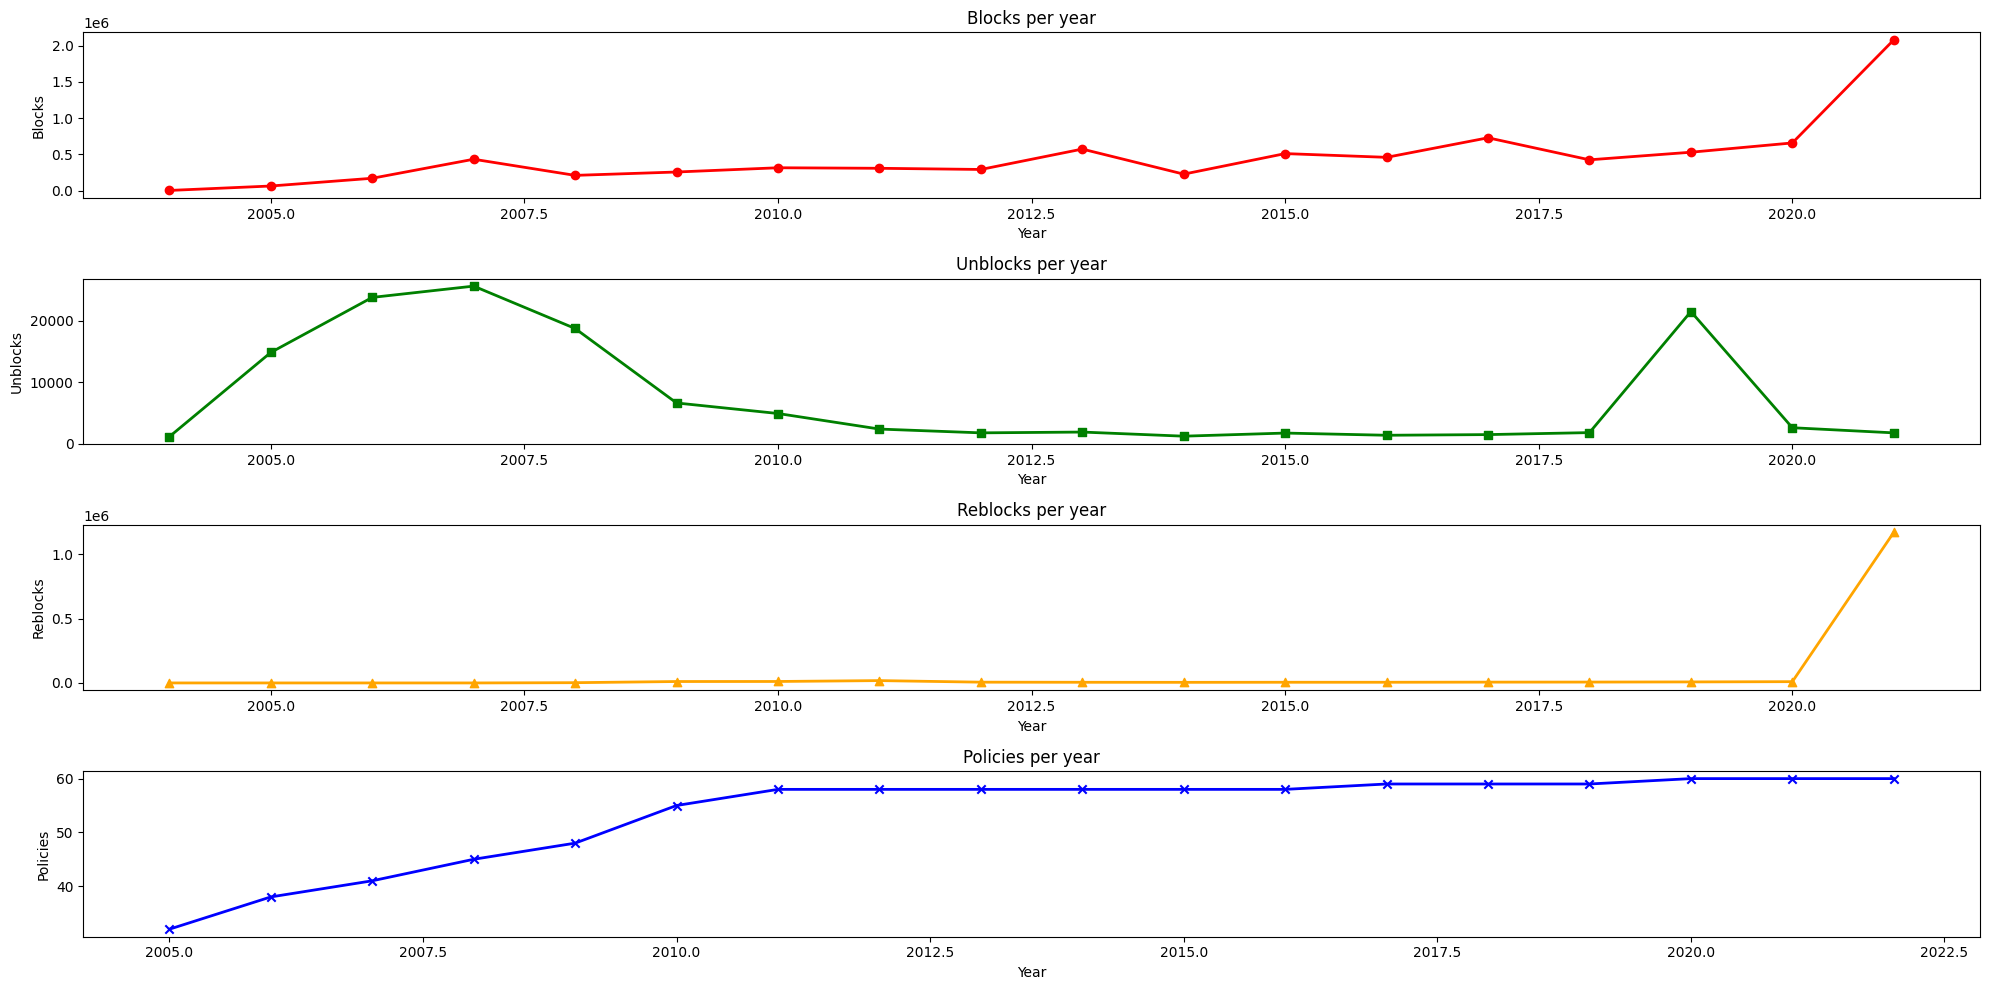

In [18]:
# Plotting block, unblock, reblock, and policies actions per year using subplots three rows and one column

fig, ax = plt.subplots(4, 1, figsize=(20, 10)) # Create a figure and a set of subplots

# Plot the data

ax[0].scatter(blocking_df['year'], blocking_df['blocks'], label='Blocks', color='red', marker='o')
ax[0].plot(blocking_df['year'], blocking_df['blocks'], color='red', linestyle='-', linewidth=2)
ax[0].set_title('Blocks per year') # Set the title of the plot
ax[0].set_xlabel('Year') # Set the label of the x-axis
ax[0].set_ylabel('Blocks') # Set the label of the y-axis

ax[1].scatter(blocking_df['year'], blocking_df['unblocks'], label='Unblocks', color='green', marker='s')
ax[1].plot(blocking_df['year'], blocking_df['unblocks'], color='green', linestyle='-', linewidth=2)
ax[1].set_title('Unblocks per year') # Set the title of the plot
ax[1].set_xlabel('Year') # Set the label of the x-axis
ax[1].set_ylabel('Unblocks') # Set the label of the y-axis

ax[2].scatter(blocking_df['year'], blocking_df['reblocks'], label='Reblocks', color='orange', marker='^')
ax[2].plot(blocking_df['year'], blocking_df['reblocks'], color='orange', linestyle='-', linewidth=2)
ax[2].set_title('Reblocks per year') # Set the title of the plot
ax[2].set_xlabel('Year') # Set the label of the x-axis
ax[2].set_ylabel('Reblocks') # Set the label of the y-axis

ax[3].scatter(nb_policies['year'], nb_policies['nb_policies'], label='Policies', color='blue', marker='x')
ax[3].plot(nb_policies['year'], nb_policies['nb_policies'], color='blue', linestyle='-', linewidth=2)
ax[3].set_title('Policies per year') # Set the title of the plot
ax[3].set_xlabel('Year') # Set the label of the x-axis
ax[3].set_ylabel('Policies') # Set the label of the y-axis

# Save figure

directory = 'figures' # Directory to store the data
# Create the directory if it doesn't exist already
if not os.path.exists(directory):
  os.makedirs(directory)

plt.tight_layout() # Adjust the subplots to fit into the figure area
plt.savefig('figures/actions_per_year.png') # Save the plot as a PNG file
plt.show() # Show the plot

### Getting list of Wikipedia policies from *Wikipedia Category* Page 

The below code segment can be run in order to get all policies list from Wikipedia. To continue the project without the need of any scrapping a previously scrapped list of policies is included after this code segment.

In [19]:
# below lines are commented so that the code can be run without the code segment

'''
from selenium import webdriver # Import the webdriver
from selenium.webdriver.chrome.options import Options # Import the Options class
from bs4 import BeautifulSoup # Import the BeautifulSoup class

# Set up headless Chrome
options = Options() # Create an Options object
options.add_argument("--headless") # Create chrome instance without UI
options.add_argument("--disable-gpu") # Disable GPU acceleration

# Set up Chrome driver
driver = webdriver.Chrome(options=options) # Create a Chrome driver instance

# URL to scrape
url = "https://en.wikipedia.org/wiki/Category:Wikipedia_policies"

# Open the URL
driver.get(url)

# Parse the page source with BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")

# Find all <a> tags with text starting with 'Wikipedia:'
list_of_policies = [] # List to store the policies
for a_tag in soup.find_all("a", text=lambda text: text and text.startswith("Wikipedia:")): # Loop through the <a> tags
  text = a_tag.text # Get the text of the <a> tag
  # Append the ending to list_of_policies list
  list_of_policies.append(text.split("Wikipedia:")[-1]) # Append the ending to list_of_policies list

# Print the list of policies
print("List of policies:", list_of_policies) # Print the list of policies

# Close the driver
driver.quit() # Close the driver
'''

'\nfrom selenium import webdriver # Import the webdriver\nfrom selenium.webdriver.chrome.options import Options # Import the Options class\nfrom bs4 import BeautifulSoup # Import the BeautifulSoup class\n\n# Set up headless Chrome\noptions = Options() # Create an Options object\noptions.add_argument("--headless") # Create chrome instance without UI\noptions.add_argument("--disable-gpu") # Disable GPU acceleration\n\n# Set up Chrome driver\ndriver = webdriver.Chrome(options=options) # Create a Chrome driver instance\n\n# URL to scrape\nurl = "https://en.wikipedia.org/wiki/Category:Wikipedia_policies"\n\n# Open the URL\ndriver.get(url)\n\n# Parse the page source with BeautifulSoup\nsoup = BeautifulSoup(driver.page_source, "html.parser")\n\n# Find all <a> tags with text starting with \'Wikipedia:\'\nlist_of_policies = [] # List to store the policies\nfor a_tag in soup.find_all("a", text=lambda text: text and text.startswith("Wikipedia:")): # Loop through the <a> tags\n  text = a_tag.text 

In [20]:
list_of_policies = ['List of policies', 'Policies and guidelines', 'Administrators', 'Arbitration Committee/CheckUser and Oversight', 'Arbitration/Policy', 'Article titles', 'Attack page', 'Banning policy', 'Biographies of living persons', 'Blocking policy', 'Bot policy', 'CheckUser', 'Child protection', 'Civility', 'Clean start', 'Consensus', 'Copyright violations', 'Copyrights', 'Criteria for speedy deletion', 'Deletion policy', 'Dispute resolution', 'Edit filter helper', 'Edit warring', 'Editing policy', 'Global rights policy', 'Harassment', 'Ignore all rules', 'Image use policy', 'Interface administrators', 'IP block exemption', 'Libel', 'Neutral point of view', 'No legal threats', 'No original research', 'No personal attacks', 'Non-free content', 'Non-free content criteria', 'Open proxies', 'Oversight', 'Ownership of content', 'Paid-contribution disclosure', 'Paid-contribution disclosure/sandbox', 'Paid-contribution disclosure/sandbox2', 'Password strength requirements', 'Privacy policy', 'Proposed deletion', 'Proposed deletion of biographies of living people', 'Protection policy', 'Reusing Wikipedia content', 'Revision deletion', 'Signatures', 'Sockpuppetry', 'Terms of use', 'Username policy', 'Vandalism', 'Verifiability', 'Volunteer Response Team', 'What Wikipedia is not', 'Wikimedia policy', 'Wikipedia is not a dictionary']

For evaluating the evolution of wikipedia policies several parameters can be taken into account. In this study, we have tried to focus on the number of edits done per year for all policies.

The below code segment scrapes each policy page's edit count per year from *xtools.wmcloud.org* in order to analyze the evolution of the policies.

**N.B. This study assumes that editing a policy is only done for the refinement or betterment of a policy.** 

It is worth remembering the all sorts of scrapping is time consuming and authors do not recommend doing it for demonstration purpose. The scrapped edit count per year per policy data is available in the **_data_** folder downloaded previously from the author's google drive. Hence the below code segment is commented out and later all data is loaded from the **_data_** folder.

**N.B. The server blocks any scrapping bot after rapid 6 attempts for 5 minutes. That is why a 5 minutes sleep is coded after 6 attempts. Unfortunately no Wikipedia API provides any edit count data for every page and so there is no other option that scrapping.**

In [21]:
# below lines are commented so that the code can be run without the code segment

'''
directory = 'data/policies/'
# Create the directory if it doesn't exist
if not os.path.exists(directory):
  os.makedirs(directory)

for url_str in list_of_policies:

  file_name = url_str

  if '/' in file_name:
    file_name = file_name.replace('/', '_')

  if list_of_policies.index(url_str) % 6 == 0 and list_of_policies.index(url_str) != 0:
    time.sleep(300) # Sleep for 5 minutes to avoid being blocked by the server

  if ' ' in url_str:
    url_str = url_str.replace(' ', '%20')

  if '/' in url_str:
    url_str = url_str.replace('/', '%2F')

  url = 'https://xtools.wmcloud.org/articleinfo/en.wikipedia.org/Wikipedia:' + url_str

  # Fetch HTML content from the URL
  driver.get(url)
  # print(driver.page_source)
  html_content = driver.page_source

  # Parse the HTML content
  soup = BeautifulSoup(html_content, 'html.parser')

  # Find the year-count-charts class
  years_class = soup.find('section', id='year-counts')

  # Find the table
  table = years_class.findChild('table')

  # Extract headers
  headers = [header.text.strip() for header in table.find_all('th')]

  # Extract rows
  rows = []
  for row in table.find_all('tr'):
    rows.append([data.text.strip() for data in row.find_all('td')])

  # Write data to CSV file
  with open(f'data/policies/{file_name}.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write headers
    writer.writerow(headers)
    # Write rows
    writer.writerows(rows)

  print(f"{file_name} edit count CSV file has been created successfully!")
'''

'\ndirectory = \'data/policies/\'\n# Create the directory if it doesn\'t exist\nif not os.path.exists(directory):\n  os.makedirs(directory)\n\nfor url_str in list_of_policies:\n\n  file_name = url_str\n\n  if \'/\' in file_name:\n    file_name = file_name.replace(\'/\', \'_\')\n\n  if list_of_policies.index(url_str) % 6 == 0 and list_of_policies.index(url_str) != 0:\n    time.sleep(300) # Sleep for 5 minutes to avoid being blocked by the server\n\n  if \' \' in url_str:\n    url_str = url_str.replace(\' \', \'%20\')\n\n  if \'/\' in url_str:\n    url_str = url_str.replace(\'/\', \'%2F\')\n\n  url = \'https://xtools.wmcloud.org/articleinfo/en.wikipedia.org/Wikipedia:\' + url_str\n\n  # Fetch HTML content from the URL\n  driver.get(url)\n  # print(driver.page_source)\n  html_content = driver.page_source\n\n  # Parse the HTML content\n  soup = BeautifulSoup(html_content, \'html.parser\')\n\n  # Find the year-count-charts class\n  years_class = soup.find(\'section\', id=\'year-counts\')\n\

### Cleaning the edit counts

In [22]:
edit_df = pd.DataFrame() # Data frame to store the data
curr_df = pd.DataFrame() # Data frame to store the data

for policy in list_of_policies: # Loop through the list of policies
  if '/' in policy: # If the policy contains a '/'
    policy = policy.replace('/', '_') # Replace the '/' with '_'

  curr_df = pd.read_csv(f'data/policies/{policy}.csv') # Read the data from the CSV file and store it in a data frame
  curr_df = curr_df[['Year', 'Edits']] # Get the required columns from the data frame

  edit_df = pd.concat([edit_df, curr_df]) # Concatenate the data frames

The purpose of this hypothesis is to compare the edit counts of all policies per year with the disruptive behaviour of the editors. That is why in the below code segment all edit counts of all policies has been summed up.

In [23]:
# Replace NaN values with 0 and commas with .

def datatype_conversion(value): # Function to convert the data type
  if type(value) == str: # If the type of the value is string
    if ',' in value: # If the value contains a comma
      return int(value.replace(',', '')) # Replace the comma with an empty string and convert the value to an integer
    else: # If the value does not contain a comma
      return int(value) # Convert the value to an integer
  else: # If the type of the value is not string
    return value # Return the value

edit_df['Edits'] = edit_df['Edits'].apply(datatype_conversion) # Apply the function to the data

edit_df = edit_df.groupby('Year')['Edits'].sum().reset_index() # Group the data by year and find the sum of the edits

In [24]:
edit_df # Display the data

,Year,Edits
0,2001,71
1,2002,379
2,2003,1205
3,2004,2881
4,2005,6860
5,2006,14354
6,2007,13604
7,2008,11558
8,2009,9938
9,2010,7455


### Display the final figure to analyze Hypothesis 1

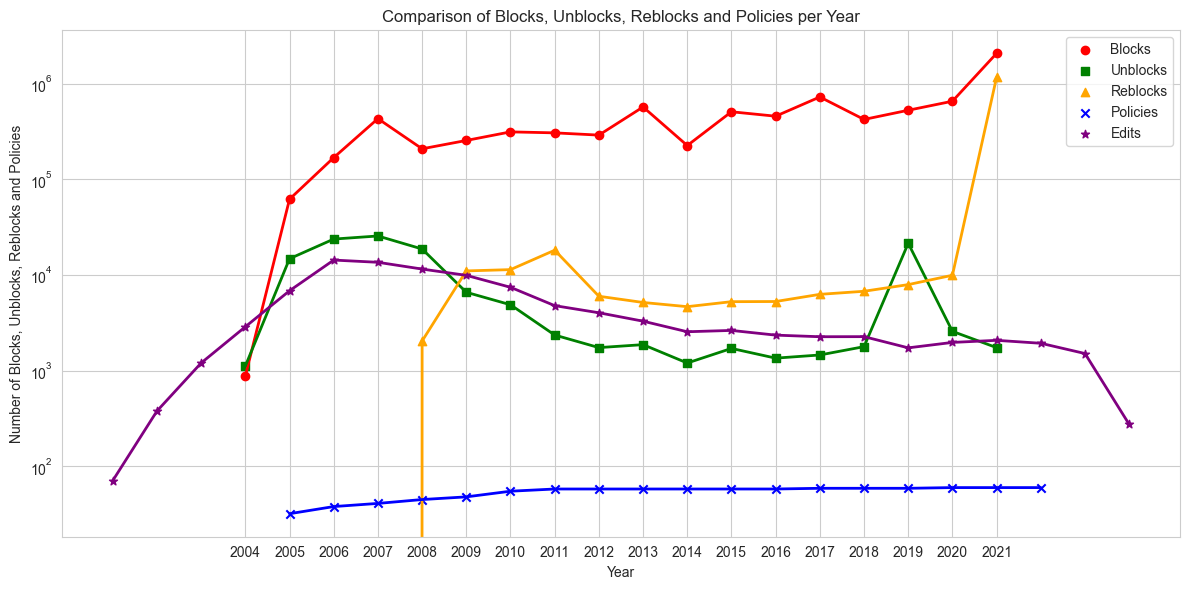

In [25]:
# Set seaborn style
sns.set_style("whitegrid") 

# scatter plot to display increasing number of blocks per year and join the points

# figure size
plt.figure(figsize=(12, 6))

# scatter plot for number of blocks per year
plt.scatter(blocking_df['year'], blocking_df['blocks'], label='Blocks', color='red', marker='o')
plt.plot(blocking_df['year'], blocking_df['blocks'], color='red', linestyle='-', linewidth=2)

# scatter plot for number of unblocks per year
plt.scatter(blocking_df['year'], blocking_df['unblocks'], label='Unblocks', color='green', marker='s')
plt.plot(blocking_df['year'], blocking_df['unblocks'], color='green', linestyle='-', linewidth=2)

# scatter plot for number of reblocks per year
plt.scatter(blocking_df['year'], blocking_df['reblocks'], label='Reblocks', color='orange', marker='^')
plt.plot(blocking_df['year'], blocking_df['reblocks'], color='orange', linestyle='-', linewidth=2)

# scatter plot for number of policies per year
plt.scatter(nb_policies['year'], nb_policies['nb_policies'], label='Policies', color='blue', marker='x')
plt.plot(nb_policies['year'], nb_policies['nb_policies'], color='blue', linestyle='-', linewidth=2)

# scatter plot for number of edits per year
plt.scatter(edit_df['Year'], edit_df['Edits'], label='Edits', color='purple', marker='*')
plt.plot(edit_df['Year'], edit_df['Edits'], color='purple', linestyle='-', linewidth=2)

# define spaces in x axis 
plt.xticks(blocking_df['year'])

# define labels
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Blocks, Unblocks, Reblocks and Policies', fontsize=10)
plt.title('Comparison of Blocks, Unblocks, Reblocks and Policies per Year', fontsize=12)
plt.yscale('log')  # log scale for y axis

# display legend and color
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('figures/comparison_of_h1.png')

# Show plot
plt.show()

The above logscale graph demonstrates a significant amount of evolve in the policies each year though the number of policies has not increased much over the years. But unfortunately the **_number of blocking_** and **_number of reblocking_** of users have increased with a very large scale. **_number of unblocking_** of the users is decreasing over the past few years.

The above graph clearly shows that the evolving wikipedia policies are unable to control or imrpove the disruptive behaviour of the editors. **Hence it proves the hypothesis 1**

## Analysis of Hypothesis 2

<hr>

Hypothesis 2 of this project states that,

**_Biased treatment by administrators and vague punishment policies lead to more disruptive behavior of editors._**

As hypothesis 1 proves that the evolving wikipedia policies are not improving the editors' disruptive behaviours, we wanted to find a potential reason behind this always increasing disruptive behaviour of the editors.

From our initial reading, we have found that wikipedia policies do not specify a certain blocking period for any specific violation. As a result, the punishment period totally depends on the judgement of the administrator. Raw blocking data from wikipedia API clearly demonstrates an administrative bias in case of any specific violation. Which in simple words means that blocking period of different editors for the same violation vary widely based on the administrator. This can clearly create frustration among a user which can be a leading cause of repetitative violations.

As there are a lot of administrative bots working behind the screens of wikipedia, we have discarded those from the database in order to analyze the administrative bias only for the human administrators.

In [26]:
h2_df = df[['params', 'type', 'action', 'user', 'year', 'comment']][~df['user'].astype(str).str.contains('Bot', case=False)] # Get the required columns from the data frame and remove bot users
h2_df = h2_df[h2_df['type'] == 'block'] # Keep only block actions

In [27]:
# drop rows with NaN values and rows where params is empty dictionary

h2_df = h2_df.dropna() # Drop rows with NaN values
h2_df = h2_df[h2_df['params'] != '{}'] # Keep only rows where params is not an empty dictionary

In [28]:
h2_df # Display the data

,params,type,action,user,year,comment
0,"{'duration': 'infinity', 'flags': []}",block,block,Angela,2004,Checking the block messages still work ok in 1.4
1,"{'duration': 'infinity', 'flags': []}",block,block,Dori,2004,testing
2,"{'duration': 'infinity', 'flags': []}",block,block,Brion VIBBER,2004,testing
14,"{'duration': 'infinity', 'flags': []}",block,block,Angela,2004,checking changes to [[MediaWiki:Blocklogentry]]
17,"{'duration': 'infinity', 'flags': []}",block,block,Angela,2004,complaining about the ugliness of the block log
...,...,...,...,...,...,...
3253232,"{'duration': 'infinity', 'flags': ['nocreate']...",block,block,Magog the Ogre,2021,Abusing [[WP:Sock puppetry|multiple accounts]]
3253233,"{'duration': '2 weeks', 'flags': ['anononly', ...",block,block,Widr,2021,[[WP:Disruptive editing|Disruptive editing]]
3253234,"{'duration': 'infinity', 'flags': ['nocreate']...",block,block,Zzuuzz,2021,Clearly [[WP:NOTHERE|not here to build an ency...
3253235,"{'duration': 'infinity', 'flags': ['nocreate']...",block,block,Acroterion,2021,[[WP:SOCK|Sock puppetry]]


The dataset is too large to do any sorts of analysis or visualization of administrative bias. To make sense out of it, we decided on using data related to the most common violation.

Extraction of the type of violation from the raw data can be a tricky task. The nature of the violation can be found in the comments of the administrators for each violation. Still the comments can be ambigious and difficult to study. So, we decided on the following keyword extraction approach:

```

Step 1: Joining all comments from each year and group them by specific years

Step 2: Converting all comments into lowercase

Step 3: User KeyBERT's generalized task model in order to extract top 10 keywords from all comments of all years

Step 4: Now from all extracted keywords from all years find the most common 30 keywords

Step 5: If possible, based on visual approach, select the most common violation otherwise sort them based on their frequency and select the top keyword

```

Now, this violation will represent a lion portion of the whole dataset and thus can be analyzed for potential administrative bias.

In [29]:
# group comments by year and convert to single string with lowercase

comments_df = h2_df.groupby('year')['comment'].apply(lambda x: ' '.join(x)).reset_index()
comments_df['comment'] = comments_df['comment'].str.lower()

comments_df

,year,comment
0,2004,checking the block messages still work ok in 1...
1,2005,graffiti vandalism vandalism vandalism vandali...
2,2006,returning vandal please contact an administrat...
3,2007,"vandalism account, personal attacks deleted {{..."
4,2008,[[wikipedia:disruptive editing|disruption]]: p...
5,2009,[[wp:vandalism|vandalism]] [[wp:vandalism|vand...
6,2010,[[wp:vandalism-only account|vandalism-only acc...
7,2011,[[wp:vandalism|vandalism]] [[wp:disruptive edi...
8,2012,disruption [[wp:vandalism|vandalism]] {{userna...
9,2013,{{checkuserblock-account}} {{checkuserblock-ac...


In [30]:
# extract keywords from comments per year using KeyBERT

from keybert import KeyBERT # Import the KeyBERT model

# Initialize KeyBERT model
kw_model = KeyBERT('all-mpnet-base-v2') # Initialize the KeyBERT model

# Extract keywords from comments
keywords = []

for comment in comments_df['comment']:
  keywords.append(kw_model.extract_keywords(comment, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=10)) # Extract top 10 keywords from the comments 

# Add keywords to comments_df
comments_df['keywords'] = keywords

In [31]:
from collections import Counter # Import the Counter class

# Concatenate all keyword lists from each year
all_keywords = [keyword for year_keywords in comments_df['keywords'] for keyword in year_keywords] # Concatenate all keyword lists from each year

# Calculate the frequency of each keyword
keyword_counter = Counter(all_keywords) # Calculate the frequency of each keyword

# Get the top 10 keywords
top_10_keywords = keyword_counter.most_common(30) # Get the top 10 keywords

top_10_keywords

[(('usernameblock', 0.3838), 1),
 (('block', 0.3832), 1),
 (('blocks', 0.369), 1),
 (('blocking', 0.3679), 1),
 (('blocked', 0.3592), 1),
 (('blocklogentry', 0.3519), 1),
 (('warnings', 0.3352), 1),
 (('blockedproxy', 0.3131), 1),
 (('vandalism', 0.2962), 1),
 (('warning', 0.2869), 1),
 (('vandalizations', 0.6003), 1),
 (('vandalisations', 0.5992), 1),
 (('personal_attacks_which_place_users_in_danger', 0.584), 1),
 (('vandalism_in_progress', 0.5692), 1),
 (('vandalization', 0.5586), 1),
 (('vandalisation', 0.5524), 1),
 (('vandalisms', 0.5478), 1),
 (('stopvandalism', 0.5326), 1),
 (('vandals', 0.5308), 1),
 (('vandalises', 0.5234), 1),
 (('sockpuppet_account_created_solely_to_reinstate_vandalism', 0.6631), 1),
 (('sockpuppets_needed_to_be_blocked', 0.5918), 1),
 (('vandalblock', 0.5462), 1),
 (('a_case_for_a_temporary_ban_from_wikipedia_under_his_general_probation',
   0.5336),
  1),
 (('administrator_intervention_against_vandalism', 0.532), 1),
 (('stop_vandalizing_', 0.5187), 1),
 (

Based on the above result, it can clearly be said that **_Vandalism_** is the most common violation in the whole dataset.

In [32]:
bias_df = h2_df[h2_df['comment'].str.contains('vandal', case=False, na=False)].reset_index(drop=True) # Keep only rows where the comment contains the word 'vandal'

In [33]:
bias_df # Display the data

,params,type,action,user,year,comment
0,"{'duration': 'infinity', 'flags': []}",block,block,CryptoDerk,2004,"repeated repeated warnings, continued vandalism"
1,"{'duration': 'infinity', 'flags': []}",block,block,CryptoDerk,2004,"warned, vandalism"
2,"{'duration': 'infinity', 'flags': []}",block,block,Rhobite,2004,sockpuppet of vandal [[User:Disgustipator]]
3,"{'duration': 'infinity', 'flags': []}",block,block,CryptoDerk,2004,"warned, vandalism"
4,"{'duration': 'infinity', 'flags': []}",block,block,Slowking Man,2004,Vandalism of [[Developed nation]]
...,...,...,...,...,...,...
986414,"{'duration': '31 hours', 'flags': ['anononly',...",block,block,Widr,2021,[[WP:Vandalism|Vandalism]]
986415,"{'duration': 'Sun, 02 Jan 2022 00:00:29 GMT', ...",block,reblock,Bbb23,2021,[[WP:Vandalism|Vandalism]]
986416,"{'duration': '31 hours', 'flags': ['anononly',...",block,block,Rosguill,2021,[[WP:Vandalism|Vandalism]]
986417,"{'duration': 'infinity', 'flags': ['nocreate']...",block,block,Muboshgu,2021,[[WP:Vandalism-only account|Vandalism-only acc...


The duration of the block is mentioned vaguely in the raw dataset. In order to make sense out of it, we have extracted the duration and converted them in *days* unit.

In [34]:
def extract_block_duration(data): # Function to extract block duration
    duration = eval(data).get('duration', None) # Get the duration from the data
    if duration is None: # If duration is None
        return np.nan # Return NaN

    if duration == 'infinity': # If duration is infinity
        return np.inf # Return infinity

    duration_map = {  # Map of duration units
        'hour': 1 / 24,
        'hours': 1 / 24,
        'day': 1,
        'days': 1,
        'week': 7,
        'weeks': 7,
        'month': 30,
        'months': 30,
        'year': 365,
        'years': 365
    }

    if isinstance(duration, str): # If duration is a string
        parts = duration.split() # Split the duration
        if len(parts) == 1:  # Only a number without any unit
            try:
                duration_in_days = float(parts[0]) # Convert the duration to a float
            except ValueError: # If the duration cannot be converted to a float
                return np.nan
        elif len(parts) == 2:  # Duration with unit
            num, unit = parts # Get the number and the unit
            try:
                duration_in_days = float(num) * duration_map.get(unit, 1) # Convert the duration to a float and multiply by the duration unit
            except ValueError: # If the duration cannot be converted to a float
                return np.nan # Return NaN
        else:
            return np.nan # Return NaN
    elif isinstance(duration, (int, float)): # If duration is an integer or a float
        duration_in_days = float(duration) # Convert the duration to a float
    else:
        return np.nan # Return NaN

    expiry = eval(data).get('expiry', None) # Get the expiry from the data
    if expiry:
        # Check if duration is in datetime format
        if not isinstance(duration, datetime.datetime): # If duration is not a datetime
            return duration_in_days # Return the duration in days
        # Calculate duration based on expiry date
        # Assuming expiry date is in yyyy-mm-dd format
        start_date = expiry.split('-') # Split the expiry date
        if len(start_date) == 3: # If the length of the start date is 3
            try:
                start_year, start_month, start_day = map(int, start_date) 
                start_date = datetime.date(start_year, start_month, start_day) # Convert the start date to a datetime object
                current_date = datetime.date.today() # Get the current date
                duration_in_days = (start_date - current_date).days
            except ValueError: # If the start date cannot be converted to a datetime object
                return None # Return None

    return duration_in_days # Return the duration in days

In [35]:
bias_df['duration'] = bias_df['params'].apply(extract_block_duration) # Apply the function to the data

In [36]:
bias_df.dropna(inplace=True) # Drop rows with NaN values
bias_df = bias_df[['action', 'user', 'year', 'duration']] # Get the required columns from the data frame

# bias_df.to_csv('bias_df.csv', index=False) # Save the data to a CSV file

bias_df # Display the data

,action,user,year,duration
0,block,CryptoDerk,2004,inf
1,block,CryptoDerk,2004,inf
2,block,Rhobite,2004,inf
3,block,CryptoDerk,2004,inf
4,block,Slowking Man,2004,inf
...,...,...,...,...
986413,block,Widr,2021,1.291667
986414,block,Widr,2021,1.291667
986416,block,Rosguill,2021,1.291667
986417,block,Muboshgu,2021,inf


In [37]:
# The below code shows the top 10 administrators with the highest number of blocks
bias_df['user'].value_counts().head(10).sum()

262874

From the above value we can be certain of two things.

- **_Vandalism_** is the most common violation of the database which alone represents a large portion of the whole data
- The top 10 administrators has blocked more people than the rest of the administrators combined

To make the overall calculation computationally non intensive, the hypothesis 2 has been analyzed only on the top 10 administrators. As they have played a significant role in the dataset, bias in their judgement can back the hypothesis 2.

### Display a stripplot to visualize the blocking duration range

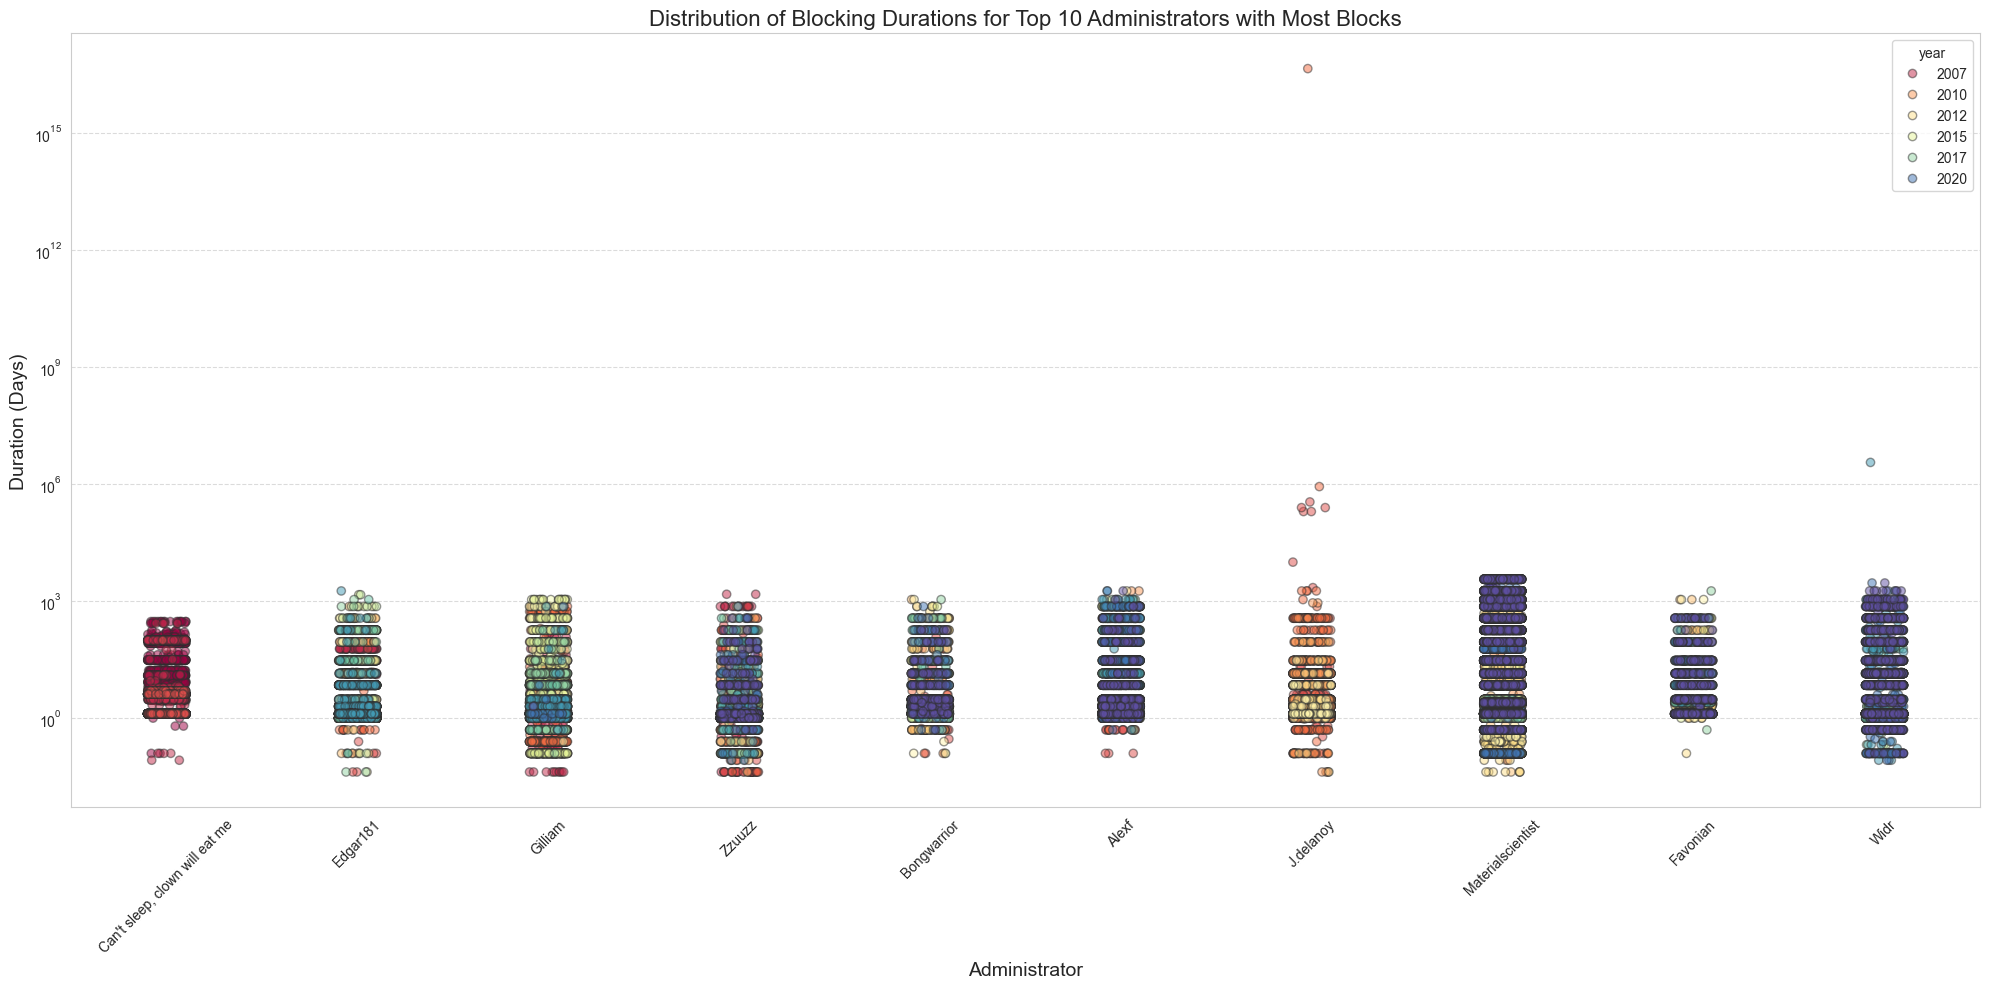

In [38]:
top_administrators = bias_df['user'].value_counts().head(10).index # Get the top 10 administrators with the highest number of blocks

# Filter the DataFrame to include only data related to these top administrators
vandalism_top_df = bias_df[bias_df['user'].isin(top_administrators)] # Filter the data frame to include only data related to these top administrators

# Plotting
plt.figure(figsize=(20, 10))
sns.stripplot(data=vandalism_top_df, x='user', y='duration', hue='year', jitter=True, size=6, palette=sns.color_palette('Spectral', as_cmap=True), linewidth=1, alpha=0.5) # Create a strip plot
plt.title('Distribution of Blocking Durations for Top 10 Administrators with Most Blocks', fontsize=16) # Set the title of the plot
plt.xlabel('Administrator', fontsize=14) # Set the label of the x-axis
plt.ylabel('Duration (Days)', fontsize=14) # Set the label of the y-axis
plt.yscale('log') # Set the scale of the y-axis to log
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Save figure
plt.savefig('figures/distribution_of_blocking_durations.png')
plt.show()

The above graph clearly demonstrates a wide range of **_blocking_** and **_reblocking_** duration for each administrator. It clearly shows the lack of judgement among the administrators while deciding on the block periods for one single violation over the yeras. The range is vast and has no specific relation in between them.

### Display a violin plot to visualize the significantly varied and wide range of durations for **_Vandalism_** over the years

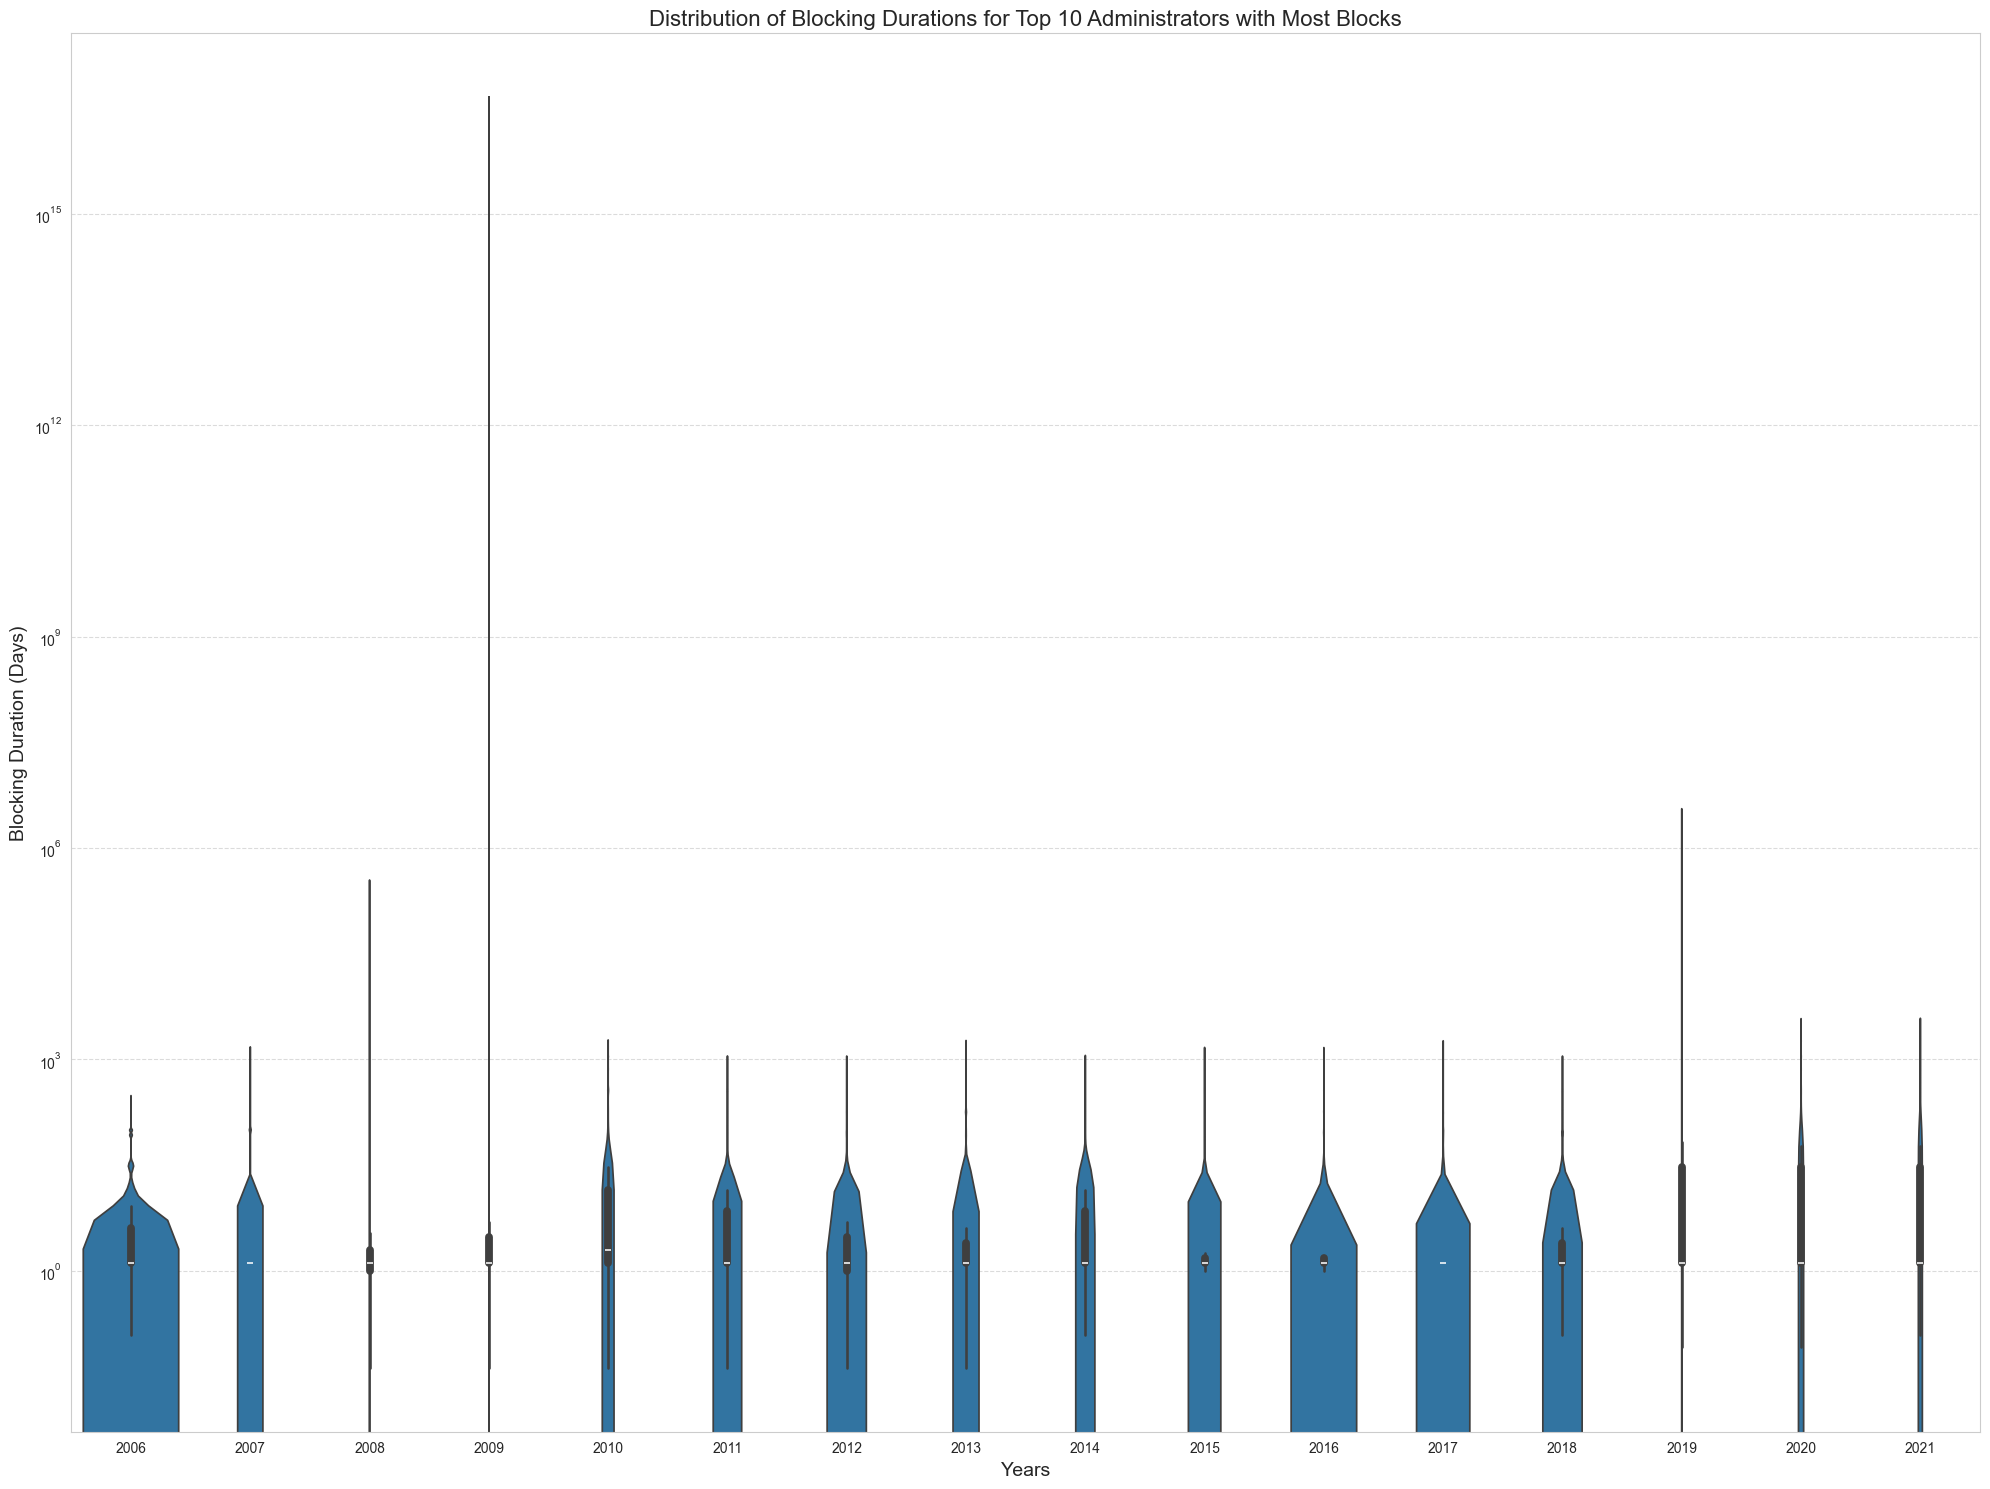

In [40]:
# Plotting
plt.figure(figsize=(20, 15)) 
sns.violinplot(data=vandalism_top_df, x='year', y='duration') # Create a violin plot
plt.title('Distribution of Blocking Durations for Top 10 Administrators with Most Blocks', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Blocking Duration (Days)', fontsize=14)
plt.yscale('log') # Set the scale of the y-axis to log
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Save figure
plt.savefig('figures/distribution_of_blocking_durations_violin.png')
plt.show()

The above graph is another demonstration of the fact that, all the administrators have ambiguously blocked every user for one single violation without any specific period or duration of the block.

The previous two graphs firmly justifies the administrative bias in case of blocking or reblocking for any specific violation and signifies the importance of a definite blocking period for every violation in the policies of wikipedia. If the blocking duration is left upon the decision of the administrators, there might be never ending bias and this will result into repetative disruptive behaviour of the editors due to their mental dissatisfaction.

The above analysis proves the presence of administrative bias in the blocking of users from the English wikipedia data and as per the belief of the authors this might be a root cause for the continuous and ever growing disruptive behaviour of the users.